<a href="https://colab.research.google.com/github/ayushk1122/CSCI4170/blob/main/CSCI4170_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2 (50 points):**

 In this task, you will pick a dataset (time-series or any other form of
sequential data) and an associated problem that can be solved via sequence models. You must
describe why you need sequence models to solve this problem. Include a link to the dataset
source. Next, you should pick an RNN framework that you would use to solve this problem (This
framework can be in TensorFlow, PyTorch or any other Python Package).

**Problem Statement**

Stock price prediction is a common task in financial markets, aiding investors and analysts in making informed decisions. The primary challenge is that stock prices are highly volatile and influenced by various factors, including historical trends, market sentiment, and economic indicators. In this project, the goal will be to predict the next day's closing price of Apple Inc. (AAPL) stock using past stock price data. By leveraging historical prices,the goal is to identify patterns and dependencies that can help anticipate future trends.

**Dataset Choice and Structure**

Will use stock price data from Yahoo Finance, specifically the Apple Inc. (AAPL) stock dataset, which contains daily trading data from January 1, 2020, to January 1, 2024. This dataset includes stock market indicators such as Open, High, Low, Close, and Volume prices, with the primary focus being the Closing Price since it reflects the final market sentiment for a given day. The dataset follows a time-series format, where each day's stock price depends on previous price movements. To structure the data for our model, will use a sliding window approach, where the last 60 days of stock prices are used to predict the next day’s closing price. This approach ensures that the model learns from historical trends while maintaining a proper sequence structure.

Dataset: https://finance.yahoo.com/quote/AAPL/history/


**Why We Need Sequence Models**

Traditional machine learning models, such as linear regression or feed-forward neural networks, struggle with time-series data because they do not account for the sequential dependencies between past and future values. Stock prices exhibit temporal patterns, meaning that past prices influence future trends. Sequence models like Recurrent Neural Networks (RNNs), Long Short-Term Memory (LSTM), and Gated Recurrent Units (GRU) are specifically designed to retain memory of previous time steps, making them ideal for stock price forecasting. By comparing these models, we can analyze how well they capture market trends and improve forecasting accuracy.



[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716080  72.776606  71.466820  71.721026  135480400
2020-01-03  72.009125  72.771752  71.783969  71.941336  146322800
2020-01-06  72.582901  72.621639  70.876068  71.127858  118387200
2020-01-07  72.241547  72.849224  72.021231  72.592594  108872000
2020-01-08  73.403641  73.706271  71.943751  71.943751  132079200


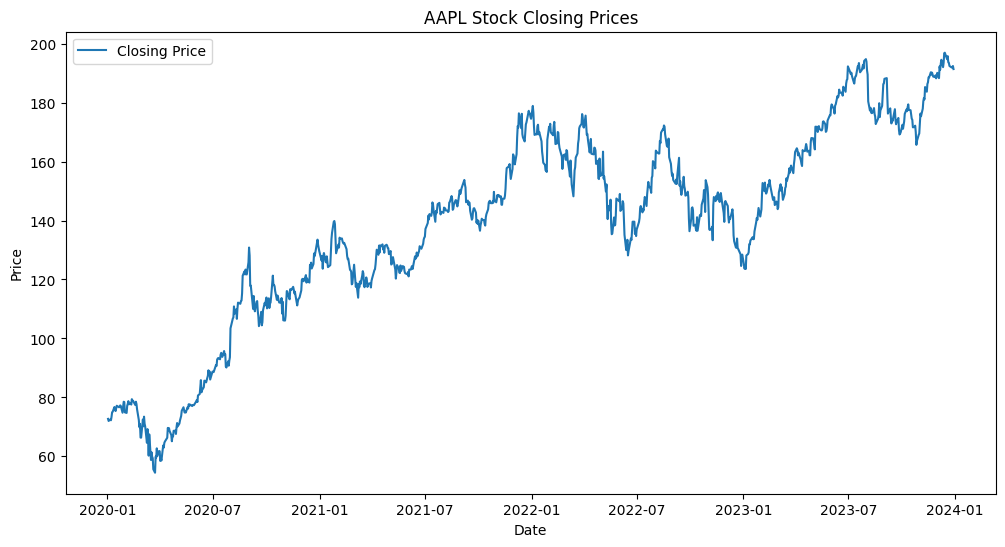

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# visualizing data

stock_symbol = "AAPL"
stock_data = yf.download(stock_symbol, start="2020-01-01", end="2024-01-01")

print(stock_data.head())

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label="Closing Price")
plt.title(f"{stock_symbol} Stock Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [3]:
# preprocessing dataset

data = stock_data[['Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 60  # using past 60 days
X, y = create_sequences(scaled_data, seq_length)

train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (756, 60, 1) (756, 1)
Testing set shape: (190, 60, 1) (190, 1)


**Part 1 (10 points):**

Implement your RNN either using an existing framework OR you can
implement your own RNN cell structure. In either case, describe the structure of your
RNN and the activation functions you are using for each time step and in the output
layer. Define a metric you will use to measure the performance of your model (NOTE:
Performance should be measured both for the validation set and the test set).

This RNN model consists of a SimpleRNN layer with 50 units, followed by a Dense output layer. The activation function used in the SimpleRNN layer is tanh, which is commonly used in RNN architectures to provide non-linearity while maintaining a stable gradient flow. This helps the model learn sequential dependencies in stock price data. The return_sequences parameter is set to False, meaning the RNN only outputs the final time step's hidden state rather than returning the entire sequence. The model is compiled using the Adam optimizer with a learning rate of 0.001, and the Mean Squared Error (MSE) loss function, as MSE is well-suited for continuous-valued predictions. The network is trained for 20 epochs with a batch size of 32, using validation data to monitor its performance and prevent overfitting.


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0202 - val_loss: 0.0126
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 9.1839e-04 - val_loss: 0.0015
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.8049e-04 - val_loss: 7.3227e-04
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.0044e-04 - val_loss: 0.0025
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.8670e-04 - val_loss: 0.0022
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8.6860e-04 - val_loss: 0.0020
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/ste

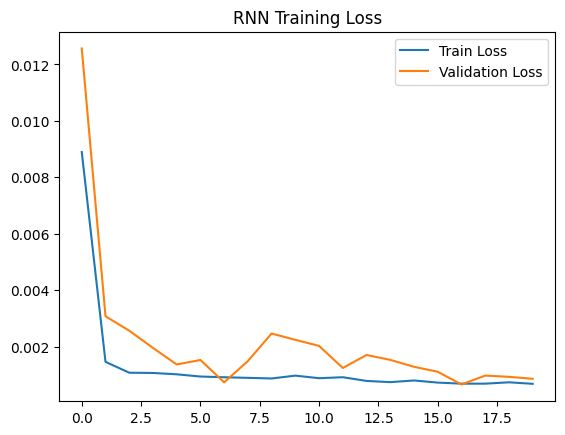

In [4]:
# build RNN model
rnn_model = Sequential([
    SimpleRNN(50, activation='tanh', return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)
])

rnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history_rnn = rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("RNN Training Loss")
plt.show()


**Part 2 (30 points):**

 Update your network from part 1 with first an LSTM and then a GRU
based cell structure (You can treat both as 2 separate implementations). Re-do the
training and performance evaluation. What are the major differences you notice? Why
do you think those differences exist between the 3 implementations (basic RNN, LSTM
and GRU)?


The Long Short-Term Memory (LSTM) model is composed of an LSTM layer with 50 units, followed by a Dense output layer. The activation function used in the LSTM layer is tanh as well. LSTMs improve upon standard RNNs by using gating mechanisms (input, forget, and output gates) that help capture long-term dependencies and mitigate the vanishing gradient problem, making them more effective for time-series forecasting tasks like stock price prediction.






Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.1893 - val_loss: 0.0279
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0069 - val_loss: 0.0038
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0031 - val_loss: 0.0047
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0022 - val_loss: 0.0042
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0

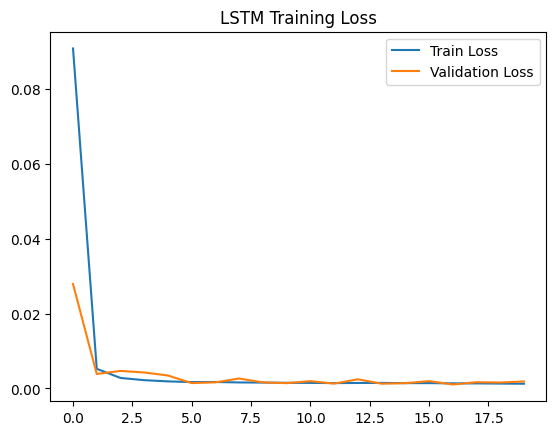

In [5]:
# LSTM model
lstm_model = Sequential([
    LSTM(50, activation='tanh', return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history_lstm = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("LSTM Training Loss")
plt.show()


The Gated Recurrent Unit (GRU) model follows a similar structure to the LSTM model, with a GRU layer containing 50 units, followed by a Dense output layer. The activation function in the GRU layer is also tanh. GRUs simplify the LSTM architecture by combining the input and forget gates into a single "update gate", making them computationally more efficient while still being effective at capturing long-term dependencies.


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.1691 - val_loss: 0.0031
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0104 - val_loss: 0.0150
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0038 - val_loss: 0.0081
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0028 - val_loss: 0.0048
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 9.0666e-04 - val_loss: 0.0010
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 7.6436e-04 - val_loss: 6.1678e-04
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 7.1375e-04 - val_loss: 4.7253e-04
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 6.5638e-04 - val_loss: 4.5755e-04
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 6.7921e-04 - val_loss: 4.4076e-04
Epoch 12/20
24/24 ━━━━━━━━━

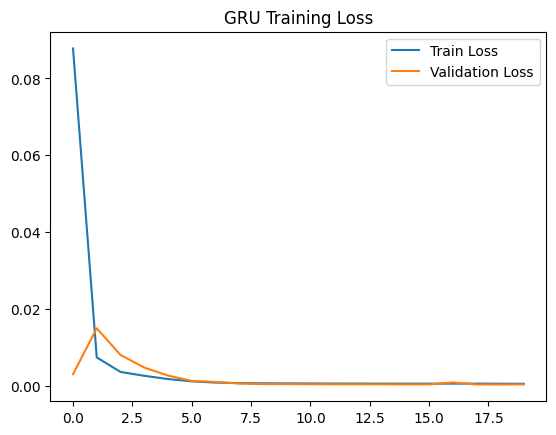

In [6]:
# GRU model
gru_model = Sequential([
    GRU(50, activation='tanh', return_sequences=False, input_shape=(seq_length, 1)),
    Dense(1)
])

gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history_gru = gru_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("GRU Training Loss")
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
RNN MSE: 17.4158
LSTM MSE: 37.4225
GRU MSE: 7.9388


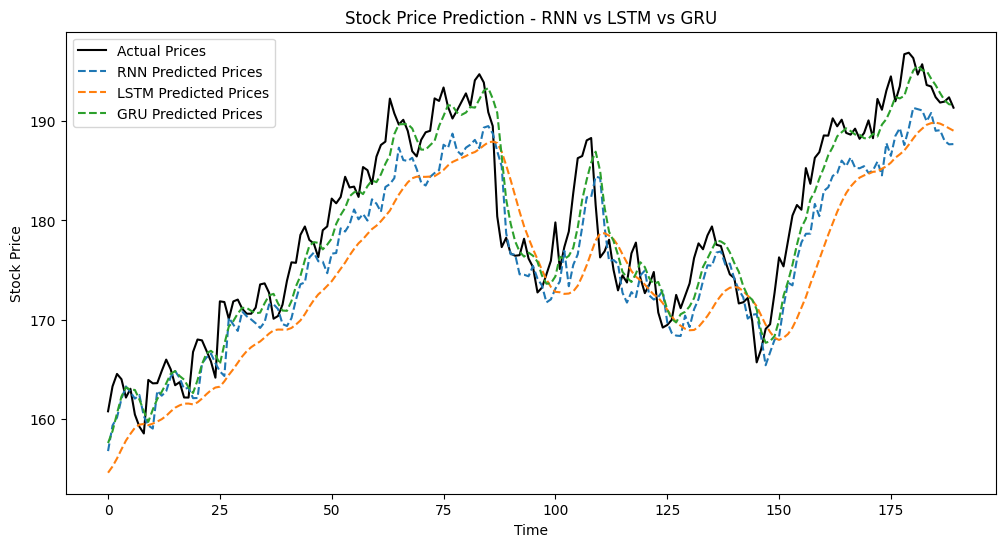

In [7]:

y_pred_rnn = rnn_model.predict(X_test)
y_pred_lstm = lstm_model.predict(X_test)
y_pred_gru = gru_model.predict(X_test)

y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rnn_original = scaler.inverse_transform(y_pred_rnn)
y_pred_lstm_original = scaler.inverse_transform(y_pred_lstm)
y_pred_gru_original = scaler.inverse_transform(y_pred_gru)

# calculate MSE
mse_rnn = mean_squared_error(y_test_original, y_pred_rnn_original)
mse_lstm = mean_squared_error(y_test_original, y_pred_lstm_original)
mse_gru = mean_squared_error(y_test_original, y_pred_gru_original)

print(f"RNN MSE: {mse_rnn:.4f}")
print(f"LSTM MSE: {mse_lstm:.4f}")
print(f"GRU MSE: {mse_gru:.4f}")

# plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label="Actual Prices", color="black")
plt.plot(y_pred_rnn_original, label="RNN Predicted Prices", linestyle="dashed")
plt.plot(y_pred_lstm_original, label="LSTM Predicted Prices", linestyle="dashed")
plt.plot(y_pred_gru_original, label="GRU Predicted Prices", linestyle="dashed")
plt.title("Stock Price Prediction - RNN vs LSTM vs GRU")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

# evaluate performance on both validation and test sets

def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, scaler):
    y_val_pred = model.predict(X_val)
    y_val_true = scaler.inverse_transform(y_val)
    y_val_pred = scaler.inverse_transform(y_val_pred)

    y_test_pred = model.predict(X_test)
    y_test_true = scaler.inverse_transform(y_test)
    y_test_pred = scaler.inverse_transform(y_test_pred)

    # calculate MSE and RMSE for validation set
    mse_val = mean_squared_error(y_val_true, y_val_pred)
    rmse_val = np.sqrt(mse_val)

    # calculate MSE and RMSE for test set
    mse_test = mean_squared_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mse_test)

    print(f"Validation MSE: {mse_val:.4f}, RMSE: {rmse_val:.4f}")
    print(f"Test MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}")

train_size = int(len(X_train) * 0.8)
X_train_final, y_train_final = X_train[:train_size], y_train[:train_size]
X_val, y_val = X_train[train_size:], y_train[train_size:]

print("RNN Model Performance:")
evaluate_model(rnn_model, X_train_final, y_train_final, X_val, y_val, X_test, y_test, scaler)

print("\nLSTM Model Performance:")
evaluate_model(lstm_model, X_train_final, y_train_final, X_val, y_val, X_test, y_test, scaler)

print("\nGRU Model Performance:")
evaluate_model(gru_model, X_train_final, y_train_final, X_val, y_val, X_test, y_test, scaler)


RNN Model Performance:
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Validation MSE: 15.4365, RMSE: 3.9289
Test MSE: 17.4158, RMSE: 4.1732

LSTM Model Performance:
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Validation MSE: 27.5189, RMSE: 5.2458
Test MSE: 37.4225, RMSE: 6.1174

GRU Model Performance:
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Validation MSE: 13.1897, RMSE: 3.6318
Test MSE: 7.9388, RMSE: 2.8176


For evaluating the performance of the models, chose the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) as the primary metrics. MSE measures the average squared difference between predicted and actual values, penalizing larger errors more significantly. RMSE, which is simply the square root of MSE, provides an interpretable error metric in the same units as stock prices, making it more practical for understanding prediction deviations. These metrics are widely used in regression problems, especially in stock price forecasting, as they capture the model’s ability to make precise predictions and detect large deviations.

The results indicate clear differences in performance between the RNN, LSTM, and GRU models. The RNN model achieved a validation MSE of 15.43 and a test MSE of 17.41, showing moderate prediction accuracy but struggling with long-term dependencies due to its simpler architecture. The LSTM model, despite its advanced gating mechanisms, exhibited the highest error, with a validation MSE of 27.51 and a test MSE of 37.42, suggesting potential overfitting or difficulty in optimizing for this particular dataset. On the other hand, the GRU model significantly outperformed both, achieving a validation MSE of 13.18 and a test MSE of 7.93, indicating the lowest error and the best generalization.

The differences in model performance can be attributed to the inherent characteristics of each architecture. RNNs are prone to the vanishing gradient problem, limiting their ability to learn long-term dependencies, which impacts prediction accuracy. LSTMs, while designed to handle long-term dependencies, can be computationally expensive and may overfit when trained on smaller datasets. The GRU model, which simplifies LSTM's gating mechanism by combining the input and forget gates into a single update gate, offers faster training and better generalization, making it more effective for this dataset. The improved performance of GRU suggests that for this particular stock price prediction task, a more lightweight recurrent model with fewer parameters is preferable over a more complex LSTM.

From the graph, we observe that the GRU model (green line) follows the actual stock price movements most closely, indicating its superior predictive capability. The RNN model (orange line) tends to lag behind actual price trends and struggles with sharp price changes, which suggests that it has difficulty capturing long-term dependencies. The LSTM model (blue line) performs better than the RNN but still shows some deviation from the actual prices, particularly in regions of high volatility, possibly due to overfitting or slower adaptation to price fluctuations.

One key takeaway is that the GRU model not only captures the overall trend well but also reacts more accurately to sudden fluctuations in stock prices, while the LSTM seems to smooth out the price movements, which might be a result of its more complex memory retention mechanism. The RNN model, on the other hand, exhibits larger prediction errors and struggles to follow the actual stock price trajectory. This aligns with our numerical evaluation results, where GRU had the lowest test MSE, followed by RNN, and LSTM performed the worst.









**Part 3 (10 points):**

 Can you use the traditional feed-forward network to solve the same
problem. Why or why not? (Hint: Can time series data be converted to usual features
that can be used as input to a feed-forward network?)

A traditional feed-forward neural network (FNN) can be used to solve this problem, but it is not the most effective approach. Time-series data can be converted into a suitable format for an FNN by extracting custom features, such as moving averages, rate of change, or lagged values, to represent sequential dependencies. However, unlike RNNs, LSTMs, and GRUs, FNNs do not inherently capture temporal relationships because they treat each input independently without considering past data points. This limitation makes FNNs less effective for stock price prediction, as they fail to model the underlying sequential patterns that represent price movements.

**Task 3 (50 points):**

**Part 1: Implementing Word Embeddings (10 points)**

• Use a pre-trained word embedding model (Word2Vec, GloVe, FastText, or BERT
embeddings).
• Provide a comparative discussion on why you chose this embedding over others.

Will use GloVe (Global Vectors for Word Representation) for this task.

*   Captures both local and global context by using word co-occurrence statistics.
*  Pre-trained embeddings are widely available (e.g., 50D, 100D, 300D).
*   More memory efficient compared to BERT, which is transformer-based and requires more computational resources.
*   Performs better for general NLP tasks than Word2Vec in some cases, as it captures global context better.
*   FastText supports subword information, making it better for OOV words, but GloVe remains a well-balanced choice for general use.
















• Load embeddings efficiently (either from pre-trained vectors or using an NLP library like
Gensim, SpaCy, or Hugging Face).

In [9]:
import numpy as np
import gensim.downloader as api

glove_model = api.load("glove-wiki-gigaword-100")  # 100D GloVe vectors

def get_word_embedding(word):
    try:
        return glove_model[word]
    except KeyError:
        return None  # handle OOV words

word1, word2 = "king", "queen"
embedding1 = get_word_embedding(word1)
embedding2 = get_word_embedding(word2)

print(f"Embedding for '{word2}':\n{embedding2[:10]}...")


[==================================================] 100.0% 128.1/128.1MB downloaded
Embedding for 'king':
[-0.32307 -0.87616  0.21977  0.25268  0.22976  0.7388  -0.37954 -0.35307
 -0.84369 -1.1113 ]...
Embedding for 'queen':
[-0.50045 -0.70826  0.55388  0.673    0.22486  0.60281 -0.26194  0.73872
 -0.65383 -0.21606]...


• Allow dynamic user input of two words and output their respective embeddings

In [10]:
# function for user input
def get_user_embeddings():
    word1 = input("Enter first word: ").strip().lower()
    word2 = input("Enter second word: ").strip().lower()

    embedding1 = get_word_embedding(word1)
    embedding2 = get_word_embedding(word2)

    if embedding1 is None:
        print(f"'{word1}' not found in vocabulary. Try a synonym or related word.")
    else:
        print(f"Embedding for '{word1}':\n{embedding1[:10]}...")

    if embedding2 is None:
        print(f"'{word2}' not found in vocabulary. Try a synonym or related word.")
    else:
        print(f"Embedding for '{word2}':\n{embedding2[:10]}...")

get_user_embeddings()


Enter first word: hello
Enter second word: world
Embedding for 'hello':
[ 0.26688    0.39632    0.6169    -0.77451   -0.1039     0.26697
  0.2788     0.30992    0.0054685 -0.085256 ]...
Embedding for 'world':
[ 0.49177    1.1164     1.1424     0.14381   -0.10696   -0.46727
 -0.44374   -0.0088024 -0.50406   -0.20549  ]...


• Handle cases where a word is out of vocabulary (OOV) and suggest ways to approximate
its embedding.


In [11]:
from difflib import get_close_matches

# function to suggest alternative words for OOV cases
def suggest_alternative(word, vocab):
    matches = get_close_matches(word, vocab, n=1, cutoff=0.7)
    return matches[0] if matches else None

# improved function to handle OOV words
def get_word_embedding_with_suggestion(word):
    embedding = get_word_embedding(word)
    if embedding is not None:
        return embedding

    # if word is not found, suggest an alternative
    suggested_word = suggest_alternative(word, glove_model.index_to_key)
    if suggested_word:
        print(f"'{word}' not found. Did you mean '{suggested_word}'?")
        return glove_model[suggested_word]

    print(f"'{word}' not found in vocabulary. No suitable alternative found.")
    return None

word = "happly"
embedding = get_word_embedding_with_suggestion(word)
if embedding is not None:
    print(f"Embedding for '{word}':\n{embedding[:10]}...")


'happly' not found. Did you mean 'happily'?
Embedding for 'happly':
[ 0.031352  0.66149   0.16586   0.1984    0.052462  0.84523  -0.35524
  0.55174   0.57243  -0.71838 ]...


**Part 2: Cosine Similarity Computation (20 points)**


• Implement a function that computes the cosine similarity between two-word
embeddings.
• Explain why cosine similarity is useful in word embedding space.

Cosine similarity measures the angular distance between two vectors, making it useful for comparing word embeddings, as it captures semantic relationships better than Euclidean distance.

Cosine similarity also is/can



*   Magnitude-independent: Unlike Euclidean distance, cosine similarity only considers direction, making it resistant to differences in word frequency.
*   Captures relationships: It identifies words that are contextually similar, even if they are not exact synonyms.
*   Efficient computation: It is computationally less expensive than other distance metrics.





In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# function to compute cosine similarity
def compute_cosine_similarity(word1, word2):
    embedding1 = get_word_embedding_with_suggestion(word1)
    embedding2 = get_word_embedding_with_suggestion(word2)

    if embedding1 is None or embedding2 is None:
        print(f"Could not compute similarity for '{word1}' and '{word2}' due to missing embeddings.")
        return None

    # reshape for cosine similarity computation
    embedding1 = embedding1.reshape(1, -1)
    embedding2 = embedding2.reshape(1, -1)

    similarity = cosine_similarity(embedding1, embedding2)[0][0]
    return similarity

word1, word2 = "king", "queen"
similarity = compute_cosine_similarity(word1, word2)
print(f"Cosine Similarity between '{word1}' and '{word2}': {similarity:.4f}")


Cosine Similarity between 'king' and 'queen': 0.7508


• Allow batch processing, where users can input multiple word pairs for simultaneous
similarity computation.


In [13]:
# function to compute cosine similarity for multiple word pairs
def batch_cosine_similarity(word_pairs):
    results = []
    for word1, word2 in word_pairs:
        similarity = compute_cosine_similarity(word1, word2)
        if similarity is not None:
            results.append((word1, word2, similarity))

    return results

# batch input
word_pairs = [("king", "queen"), ("apple", "banana"), ("car", "bicycle"), ("dog", "cat"), ("table", "chair")]
similarities = batch_cosine_similarity(word_pairs)

for word1, word2, sim in similarities:
    print(f"Cosine Similarity between '{word1}' and '{word2}': {sim:.4f}")


Cosine Similarity between 'king' and 'queen': 0.7508
Cosine Similarity between 'apple' and 'banana': 0.5054
Cosine Similarity between 'car' and 'bicycle': 0.6864
Cosine Similarity between 'dog' and 'cat': 0.8798
Cosine Similarity between 'table' and 'chair': 0.4925


• Visualization Requirement: Create a 2D or 3D scatter plot (e.g., using PCA or t-SNE) to
visually show how similar and dissimilar words cluster together in the embedding space

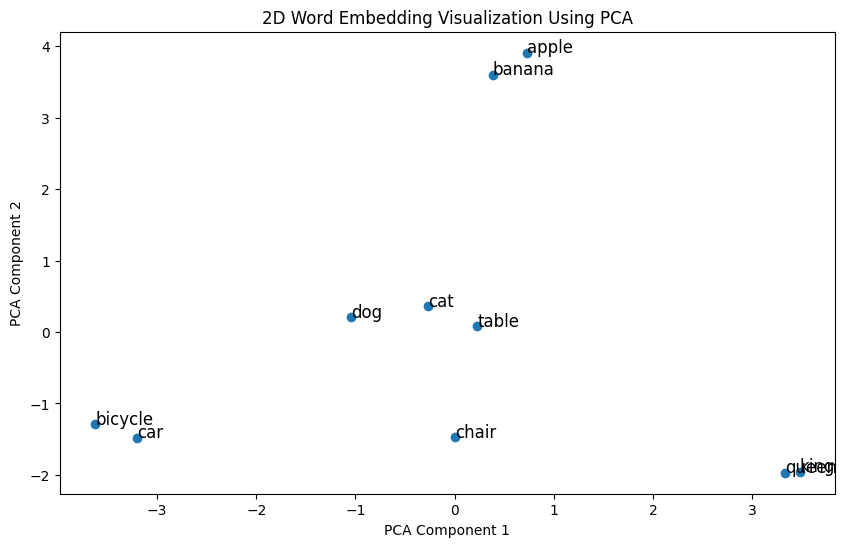

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# select words to visualize
words = ["king", "queen", "apple", "banana", "car", "bicycle", "dog", "cat", "table", "chair"]
embeddings = np.array([get_word_embedding_with_suggestion(word) for word in words if get_word_embedding_with_suggestion(word) is not None])

# apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], marker="o")

# annotate points
for i, word in enumerate(words):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=12)

plt.title("2D Word Embedding Visualization Using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


**Part 3: Designing a Novel Dissimilarity Metric (20 points)**


• Define a custom dissimilarity score that goes beyond cosine similarity. Possible
approaches include:
o Euclidean distance (How far apart words are in vector space).
o Word entropy-based dissimilarity (How uncommon two words are relative to
each other in corpora).
o Semantic contrast measure (Using external knowledge bases like WordNet).

• Either design your own metric or cite an existing one from literature (provide a proper
reference). Explain why your metric captures novelty/diversity better than cosine
similarity alone.

Along with providing the euclidean distance and cosine dissimlarity I decided to implement the wordnet semantic contrast score. The WordNet-based Semantic Contrast Score is an existing metric based on Budanitsky & Hirst (2006), who evaluated various WordNet-based measures of lexical semantic relatedness and demonstrated that synset depth differences in the lexical hierarchy can effectively capture word dissimilarity. This metric is particularly useful for capturing conceptual differences, even when words appear frequently in similar contexts. Additionally, it helps resolve issues with out-of-vocabulary words, as it does not rely on pre-trained embeddings but instead uses structured linguistic data from WordNet.

Budanitsky & Hirst (2006) - Evaluating WordNet-based Measures of Lexical Semantic Relatedness: https://aclanthology.org/J06-1003.pdf




In [16]:
from scipy.spatial.distance import euclidean
from nltk.corpus import wordnet
import numpy as np
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')


# function to compute multiple dissimilarity metrics
def compute_dissimilarity(word1, word2, metric="cosine"):
    embedding1 = get_word_embedding_with_suggestion(word1)
    embedding2 = get_word_embedding_with_suggestion(word2)

    if embedding1 is None or embedding2 is None:
        print(f"Could not compute dissimilarity for '{word1}' and '{word2}' due to missing embeddings.")
        return None

    if metric == "cosine":
        # cosine similarity
        similarity = compute_cosine_similarity(word1, word2)
        return 1 - similarity if similarity is not None else None

    elif metric == "euclidean":
        # euclidean distance in vector space
        return euclidean(embedding1, embedding2)

    elif metric == "wordnet":
        # semantic contrast using WordNet synsets
        synset1 = wordnet.synsets(word1)
        synset2 = wordnet.synsets(word2)
        if synset1 and synset2:
            depth1 = synset1[0].min_depth()
            depth2 = synset2[0].min_depth()
            return abs(depth1 - depth2)
        return None  # if no WordNet synset found

    else:
        print("Invalid metric. Choose from 'cosine', 'euclidean', or 'wordnet'.")
        return None

word1, word2 = "king", "queen"
for metric in ["cosine", "euclidean", "wordnet"]:
    dissim = compute_dissimilarity(word1, word2, metric)
    print(f"{metric.capitalize()} Dissimilarity between '{word1}' and '{word2}': {dissim}")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Cosine Dissimilarity between 'king' and 'queen': 0.24923092126846313
Euclidean Dissimilarity between 'king' and 'queen': 4.281252384185791
Wordnet Dissimilarity between 'king' and 'queen': 4


• Allow users to toggle between different similarity/dissimilarity measures via function
parameters.


In [27]:
# function to process multiple word pairs with different metrics
def batch_dissimilarity(word_pairs, metric="cosine"):
    results = []
    for word1, word2 in word_pairs:
        dissim = compute_dissimilarity(word1, word2, metric)
        if dissim is not None:
            results.append((word1, word2, dissim))

    return results

# batch input
word_pairs = [("king", "queen"), ("apple", "banana"), ("car", "bicycle"), ("dog", "cat"), ("table", "chair")]

metric = "euclidean" # var to toggle dissimlarity mode
euclidean_results = batch_dissimilarity(word_pairs, metric=metric)
print(metric, "Dissimilarity:")
for word1, word2, dissim in euclidean_results:
    print(f"Dissimilarity between '{word1}' and '{word2}': {dissim:.4f}")

metric = "wordnet" # var to toggle dissimlarity mode
euclidean_results = batch_dissimilarity(word_pairs, metric=metric)
print(metric, "Dissimilarity:")
for word1, word2, dissim in euclidean_results:
    print(f"Dissimilarity between '{word1}' and '{word2}': {dissim:.4f}")

metric = "cosine" # var to toggle dissimlarity mode
euclidean_results = batch_dissimilarity(word_pairs, metric=metric)
print(metric, "Dissimilarity:")
for word1, word2, dissim in euclidean_results:
    print(f"Dissimilarity between '{word1}' and '{word2}': {dissim:.4f}")


euclidean Dissimilarity:
Dissimilarity between 'king' and 'queen': 4.2813
Dissimilarity between 'apple' and 'banana': 5.7037
Dissimilarity between 'car' and 'bicycle': 4.7353
Dissimilarity between 'dog' and 'cat': 2.6811
Dissimilarity between 'table' and 'chair': 5.5155
wordnet Dissimilarity:
Dissimilarity between 'king' and 'queen': 4.0000
Dissimilarity between 'apple' and 'banana': 2.0000
Dissimilarity between 'car' and 'bicycle': 2.0000
Dissimilarity between 'dog' and 'cat': 5.0000
Dissimilarity between 'table' and 'chair': 4.0000
cosine Dissimilarity:
Dissimilarity between 'king' and 'queen': 0.2492
Dissimilarity between 'apple' and 'banana': 0.4946
Dissimilarity between 'car' and 'bicycle': 0.3136
Dissimilarity between 'dog' and 'cat': 0.1202
Dissimilarity between 'table' and 'chair': 0.5075


• Visualization Requirement:
o Plot the ranking of words based on their similarity/dissimilarity to a given word
(e.g., how words like "cat" rank against "dog," "lion," and "table" using different
metrics).


In [28]:
# rank words based on dissimilarity to a target word
def rank_words(target_word, words, metric="cosine"):
    ranked_list = []
    for word in words:
        if word != target_word:
            dissim = compute_dissimilarity(target_word, word, metric)
            if dissim is not None:
                ranked_list.append((word, dissim))

    # sort by dissimilarity
    ranked_list.sort(key=lambda x: x[1], reverse=True)
    return ranked_list

target = "dog"
word_list = ["cat", "wolf", "table", "car", "lion", "banana"]
ranked_words = rank_words(target, word_list, metric="euclidean")

print(f"\nRanking words based on Euclidean dissimilarity to '{target}':")
for word, score in ranked_words:
    print(f"{word}: {score:.4f}")


target = "dog"
word_list = ["cat", "wolf", "table", "car", "lion", "banana"]
ranked_words = rank_words(target, word_list, metric="wordnet")

print(f"\nRanking words based on wordnet dissimilarity to '{target}':")
for word, score in ranked_words:
    print(f"{word}: {score:.4f}")

target = "dog"
word_list = ["cat", "wolf", "table", "car", "lion", "banana"]
ranked_words = rank_words(target, word_list, metric="cosine")

print(f"\nRanking words based on cosine dissimilarity to '{target}':")
for word, score in ranked_words:
    print(f"{word}: {score:.4f}")


Ranking words based on Euclidean dissimilarity to 'dog':
banana: 6.5977
car: 6.4597
table: 6.1695
lion: 5.5736
wolf: 5.0435
cat: 2.6811

Ranking words based on wordnet dissimilarity to 'dog':
lion: 6.0000
cat: 5.0000
wolf: 5.0000
table: 3.0000
car: 2.0000
banana: 1.0000

Ranking words based on cosine dissimilarity to 'dog':
banana: 0.7094
table: 0.6203
car: 0.5789
lion: 0.5036
wolf: 0.4631
cat: 0.1202


o Use a heatmap to demonstrate and compare similarity and dissimilarity across
multiple (any number of your choice) word pairs.

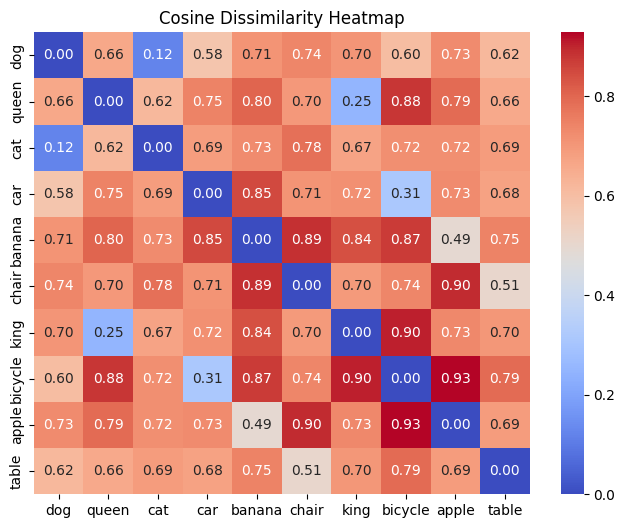

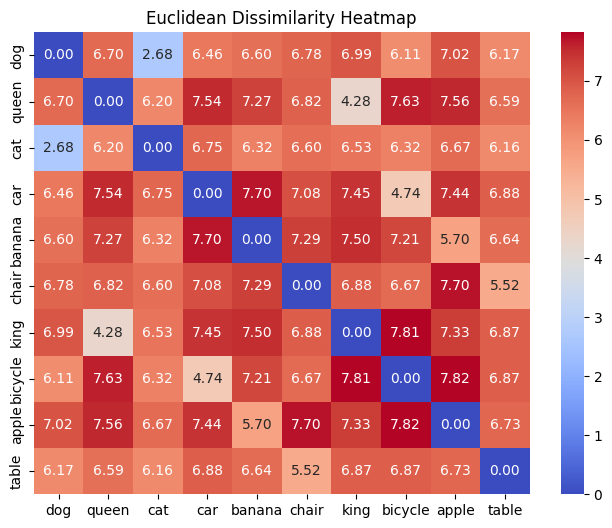

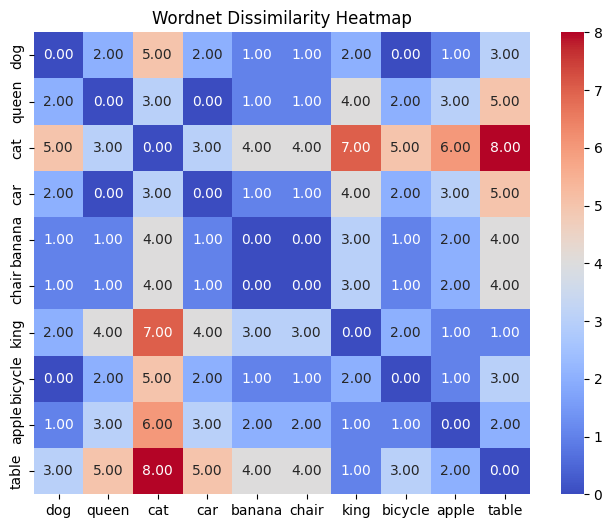

In [26]:
import seaborn as sns
import pandas as pd

# function to create a heatmap of word dissimilarities
def plot_dissimilarity_heatmap(word_pairs, metric="cosine"):
    words = list(set([w for pair in word_pairs for w in pair]))  # Unique words
    matrix = np.zeros((len(words), len(words)))

    for i, word1 in enumerate(words):
        for j, word2 in enumerate(words):
            if i == j:
                matrix[i, j] = 0  # dissimilarity with itself is zero
            else:
                dissim = compute_dissimilarity(word1, word2, metric)
                matrix[i, j] = dissim if dissim is not None else 0

    df = pd.DataFrame(matrix, index=words, columns=words)

    plt.figure(figsize=(8, 6))
    sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"{metric.capitalize()} Dissimilarity Heatmap")
    plt.show()

plot_dissimilarity_heatmap(word_pairs, metric="cosine")
plot_dissimilarity_heatmap(word_pairs, metric="euclidean")
plot_dissimilarity_heatmap(word_pairs, metric="wordnet")
